In [33]:
#Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

#Import scikit-learn machine learning model
from sklearn.neighbors import KNeighborsClassifier, NearestNeighbors

#Import scikit-learn metrics and preprocessing libraries
from sklearn.metrics import accuracy_score, classification_report
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

In [34]:
# Load the main dataframe
nfl_df = pd.read_csv('/content/sample_data/nfl_gamelogs_vegas_2017-2025_NEW (10).csv')
print(nfl_df)
nfl_df.info()

      Season Team   Gtm  Week        Date  Day  Home Opp_x  Win  Tm_Pts  ...  \
0       2018  CRD   1.0   1.0  2018-09-09  Sun     1   WAS    0     6.0  ...   
1       2018  CRD   2.0   2.0  2018-09-16  Sun     0   LAR    0     0.0  ...   
2       2018  CRD   3.0   3.0  2018-09-23  Sun     1   CHI    0    14.0  ...   
3       2018  CRD   4.0   4.0  2018-09-30  Sun     1   SEA    0    17.0  ...   
4       2018  CRD   5.0   5.0  2018-10-07  Sun     0   SFO    1    28.0  ...   
...      ...  ...   ...   ...         ...  ...   ...   ...  ...     ...  ...   
4067    2025  WAS   7.0   7.0  2025-10-19  Sun     0   DAL    0    22.0  ...   
4068    2025  WAS   8.0   8.0  2025-10-27  Mon     0   KAN    0     7.0  ...   
4069    2025  WAS   9.0   9.0  2025-11-02  Sun     1   SEA    0    14.0  ...   
4070    2025  WAS  10.0  10.0  2025-11-09  Sun     1   DET    0    22.0  ...   
4071    2025  WAS  11.0  11.0  2025-11-16  Sun     0   MIA    0    13.0  ...   

      Opp_PenYds  Opp_FL  Opp_Int  Opp_

In [35]:
# Add some columns
nfl_df['True_Total'] = nfl_df['Tm_Pts'] + nfl_df['Opp_Pts']
nfl_df['Over'] = np.where(nfl_df['True_Total'] > nfl_df['Total'], 1, 0)
nfl_df['Under'] = np.where(nfl_df['True_Total'] < nfl_df['Total'], 1, 0)
nfl_df['Push'] = np.where(nfl_df['True_Total'] == nfl_df['Total'], 1, 0)
print(nfl_df)
for season in range(2022, 2025):
    print(nfl_df.query('Season == @season and Week == 13')['Under'].mean())
# Sort the data by Season, then by Week
nfl_df = nfl_df.sort_values(by=['Season','Week']).reset_index(drop=True)

      Season Team   Gtm  Week        Date  Day  Home Opp_x  Win  Tm_Pts  ...  \
0       2018  CRD   1.0   1.0  2018-09-09  Sun     1   WAS    0     6.0  ...   
1       2018  CRD   2.0   2.0  2018-09-16  Sun     0   LAR    0     0.0  ...   
2       2018  CRD   3.0   3.0  2018-09-23  Sun     1   CHI    0    14.0  ...   
3       2018  CRD   4.0   4.0  2018-09-30  Sun     1   SEA    0    17.0  ...   
4       2018  CRD   5.0   5.0  2018-10-07  Sun     0   SFO    1    28.0  ...   
...      ...  ...   ...   ...         ...  ...   ...   ...  ...     ...  ...   
4067    2025  WAS   7.0   7.0  2025-10-19  Sun     0   DAL    0    22.0  ...   
4068    2025  WAS   8.0   8.0  2025-10-27  Mon     0   KAN    0     7.0  ...   
4069    2025  WAS   9.0   9.0  2025-11-02  Sun     1   SEA    0    14.0  ...   
4070    2025  WAS  10.0  10.0  2025-11-09  Sun     1   DET    0    22.0  ...   
4071    2025  WAS  11.0  11.0  2025-11-16  Sun     0   MIA    0    13.0  ...   

      Opp_TO  Opp_ToP  Opp_y  Spread  T


Results for 2022:
 Week              1: accuracy score=43.75%
 Week              2: accuracy score=43.75%
 Week              3: accuracy score=73.33%
 Week              4: accuracy score=56.25%
 Week              5: accuracy score=50.00%
 Week              6: accuracy score=57.14%
 Week              7: accuracy score=64.29%
 Week              8: accuracy score=42.86%
 Week              9: accuracy score=23.08%
 Week             10: accuracy score=50.00%
 Week             11: accuracy score=50.00%
 Week             12: accuracy score=68.75%
 Week             13: accuracy score=53.33%
 Week             14: accuracy score=76.92%
 Week             15: accuracy score=31.25%
 Week             16: accuracy score=31.25%
 Week             17: accuracy score=60.00%
 Week             18: accuracy score=43.75%
Season 2022: Total accuracy score=50.93%

Classification Report for 2022:
              precision    recall  f1-score   support

        Over       0.45      0.55      0.50       119
      

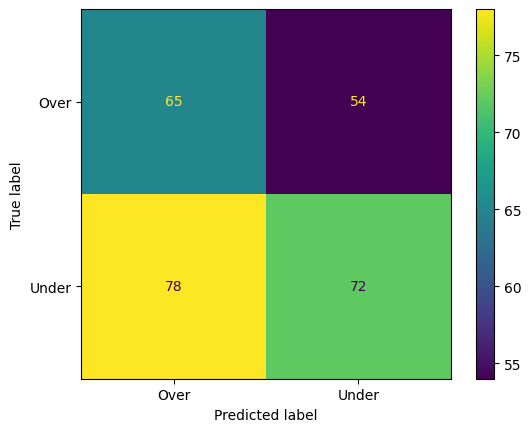


Results for 2023:
 Week              1: accuracy score=46.67%
 Week              2: accuracy score=56.25%
 Week              3: accuracy score=56.25%
 Week              4: accuracy score=62.50%
 Week              5: accuracy score=85.71%
 Week              6: accuracy score=33.33%
 Week              7: accuracy score=61.54%
 Week              8: accuracy score=37.50%
 Week              9: accuracy score=50.00%
 Week             10: accuracy score=71.43%
 Week             11: accuracy score=54.55%
 Week             12: accuracy score=68.75%
 Week             13: accuracy score=53.85%
 Week             14: accuracy score=40.00%
 Week             15: accuracy score=50.00%
 Week             16: accuracy score=26.67%
 Week             17: accuracy score=46.67%
 Week             18: accuracy score=46.67%
Season 2023: Total accuracy score=52.45%

Classification Report for 2023:
              precision    recall  f1-score   support

        Over       0.48      0.44      0.46       121
      

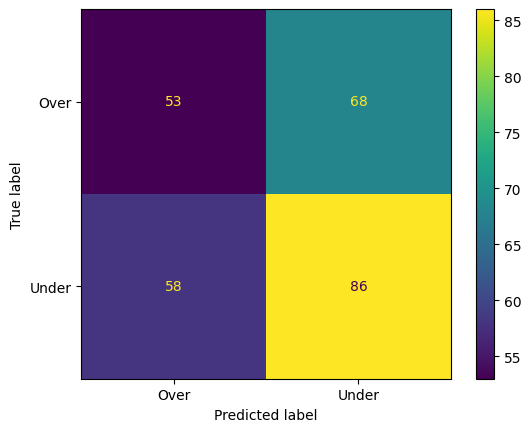


Results for 2024:
 Week              1: accuracy score=66.67%
 Week              2: accuracy score=46.67%
 Week              3: accuracy score=31.25%
 Week              4: accuracy score=62.50%
 Week              5: accuracy score=50.00%
 Week              6: accuracy score=23.08%
 Week              7: accuracy score=60.00%
 Week              8: accuracy score=50.00%
 Week              9: accuracy score=73.33%
 Week             10: accuracy score=46.15%
 Week             11: accuracy score=42.86%
 Week             12: accuracy score=61.54%
 Week             13: accuracy score=56.25%
 Week             14: accuracy score=53.85%
 Week             15: accuracy score=33.33%
 Week             16: accuracy score=43.75%
 Week             17: accuracy score=75.00%
 Week             18: accuracy score=56.25%
Season 2024: Total accuracy score=52.06%

Classification Report for 2024:
              precision    recall  f1-score   support

        Over       0.57      0.50      0.53       145
      

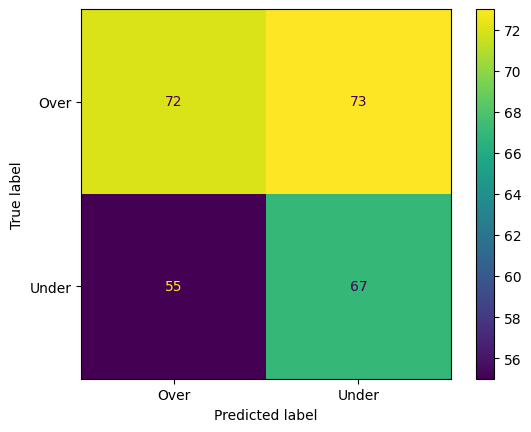

In [36]:
# Create and Evaluate a Model for NFL Totals (1 = Under, 0 = Over or Push)
# Set the dataframe
df = nfl_df.query('Home == 1').reset_index(drop=True)
# Set the features and the target variable
features = ['Spread','Total']
target = 'Under'
# Iterate over the last three seasons
for season in [2022, 2023, 2024]:
    # Display the season
    print(f'\nResults for {season}:')
    # Initialize the season aggregates
    y_preds = []
    y_trues = []
    # Iterate over the weeks in the season
    for week in range(1, 19):
        # Display the current Week
        print(f' Week {week:>14}:', end=' ')
        # Create training set
        train_df = df.query('Season < @season or (Season == @season and Week < @week)')
        # Create testing set
        test_df = df.query('Season == @season and Week == @week and True_Total != Total')
        # Create X_train, y_train, X_test, y_test
        X_train = train_df[features]
        y_train = train_df[target]
        X_test = test_df[features]
        y_test = test_df[target]
        # Set the model
        model = KNeighborsClassifier(n_neighbors=7)
        # Train the model
        clf = model.fit(X_train, y_train)
        # Get the predictions
        y_pred = clf.predict(X_test)
        # Get the true values
        y_true = y_test
        # Display the accuracy score for the current week
        if len(y_true) > 0:
            print(f'accuracy score={accuracy_score(y_true, y_pred):.2%}')
        else:
            print('No games to predict')
        # Update the season aggregates
        y_preds += list(y_pred)
        y_trues += list(y_true)
    # Display the total accuracy score for the current season
    if len(y_trues) > 0:
        print(f'Season {season}: Total accuracy score={accuracy_score(y_trues, y_preds):.2%}')
        # Display the classification report for the current season
        print(f'\nClassification Report for {season}:')
        print(classification_report(y_trues, y_preds, target_names=['Over','Under']))
        # Display the confusion matrix for the current season (looking for >52 predicted on precision/under to make profit)
        cm = confusion_matrix(y_trues, y_preds)
        display = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Over','Under'])
        display.plot()
        plt.grid(False)
        plt.show()

In [37]:
# Get and display the neighbors for games in Season 2024, Week 18
# Iterate through the test instances and find their nearest neighbors
index = 0
for game_index, spread, total in X_test.itertuples():
    # Get the neighbor distances and indices in the dataframe
    nbr_distance = clf.kneighbors(X_test)[0][index]
    nbr_index = clf.kneighbors(X_test)[1][index]
    index += 1
    # Display the games, the distances, and the neighbors
    print(f'GAME')
    print(df.iloc[[game_index],:][['Season','Week','Team','Opp_x','Spread','Total','True_Total','Under']])
    print(f'\nNEAREST NEIGHBORS (distances={[round(value, 2) for value in nbr_distance]})')
    print(df.iloc[nbr_index,:][['Season','Week','Team','Opp_x','Spread','Total','True_Total','Under']])
    print('\n')

GAME
      Season  Week Team Opp_x  Spread  Total  True_Total  Under
1839    2024  18.0  CRD   SFO    -4.5   43.0        71.0      0

NEAREST NEIGHBORS (distances=[np.float64(0.0), np.float64(0.5), np.float64(0.5), np.float64(0.5), np.float64(0.5), np.float64(0.5), np.float64(0.5)])
      Season  Week Team Opp_x  Spread  Total  True_Total  Under
879     2021   8.0  CLE   PIT    -4.5   43.0        25.0      1
1395    2023   6.0  JAX   IND    -4.5   43.5        57.0      0
1355    2023   3.0  SEA   CAR    -5.0   43.0        64.0      0
18      2018   2.0  CHI   SEA    -4.5   42.5        41.0      1
529     2020   2.0  CHI   NYG    -4.5   42.5        30.0      1
1781    2024  14.0  KAN   LAC    -4.0   43.0        36.0      1
859     2021   6.0  PIT   SEA    -5.0   43.0        43.0      0


GAME
      Season  Week Team Opp_x  Spread  Total  True_Total  Under
1840    2024  18.0  ATL   CAR    -9.0   48.0        82.0      0

NEAREST NEIGHBORS (distances=[np.float64(0.5), np.float64(0.5), np.f

In [38]:
# Make predictions for NFL Totals (Season = 2025, Week = 13)
# Set the dataframe
df = nfl_df.query('Home == 1').reset_index(drop=True)
# Set the features and the target variable
features = ['Spread','Total']
target = 'Under'
# Set the season and the week
season = 2025
week = 13

In [39]:
# Create training set
train_df = df.query('Season < @season or (Season == @season and Week < @week)')
# Create X_train and y_train
X_train = train_df[features]
y_train = train_df[target]

In [56]:
# Two-dimensional list with upcoming game data from the home team's perspective

week13 = [['Packers @ Lions', -3.0, 48.5],
['Chiefs @ Cowboys', +3.5, 52.5],
['Bengals @ Ravens', -7.0, 51.5],
['Bears @ Eagles', -7.0, 44.5],
['Rams @ Panthers', +10.5, 45.5],
['Cardinals @ Buccaneers', -4.5, 44.5],
['Jaguars @ Titans', +6.5, 41.5],
['Saints @ Dolphins', -5.5, 42.5],
['49ers @ Browns', +4.5, 35.5],
['Falcons @ Jets', +2.5, 39.5],
['Texans @ Colts', -3.5, 44.5],
['Vikings @ Seahawks', -11.5, 41.5],
['Bills @ Steelers', +3.0, 45.5],
['Raiders @ Chargers', -9.5, 40.5],
['Broncos @ Commanbders', +5.5, 43.5],
['Giants @ Patriots', -7.5, 46.5]
]

In [57]:
# Create X_new dataframe from the upcoming game data
X_new = pd.DataFrame(week13, columns=['Game','Spread','Total'])

In [58]:
# Set the model
model = KNeighborsClassifier(n_neighbors=7)

In [59]:
# Fit the classifier
clf = model.fit(X_train, y_train)

In [60]:
# Make the predictions
y_pred = clf.predict(X_new[features])

In [61]:
# Add predictions to the dataframe
X_new['KNN(7)'] = y_pred
X_new['KNN(7)'] = X_new['KNN(7)'].apply(lambda x: 'Under' if x == 1 else 'Over')

In [62]:
# Display the dataframe with the predictions
print(f'MODEL PREDICTIONS FOR WEEK {week} OF THE {season} NFL SEASON\n')
print(X_new[['Game','Spread','Total','KNN(7)']])

MODEL PREDICTIONS FOR WEEK 13 OF THE 2024 NFL SEASON

                      Game  Spread  Total KNN(7)
0          Packers @ Lions    -3.0   48.5   Over
1         Chiefs @ Cowboys     3.5   52.5  Under
2         Bengals @ Ravens    -7.0   51.5   Over
3           Bears @ Eagles    -7.0   44.5   Over
4          Rams @ Panthers    10.5   45.5   Over
5   Cardinals @ Buccaneers    -4.5   44.5   Over
6         Jaguars @ Titans     6.5   41.5   Over
7        Saints @ Dolphins    -5.5   42.5  Under
8           49ers @ Browns     4.5   35.5   Over
9           Falcons @ Jets     2.5   39.5  Under
10          Texans @ Colts    -3.5   44.5   Over
11      Vikings @ Seahawks   -11.5   41.5   Over
12        Bills @ Steelers     3.0   45.5   Over
13      Raiders @ Chargers    -9.5   40.5   Over
14   Broncos @ Commanbders     5.5   43.5  Under
15       Giants @ Patriots    -7.5   46.5  Under


In [63]:
# Week Unders in 2022, 2023, and 2024
for season in [2022, 2023, 2024]:
  week13_df = nfl_df.query('Season == @season and Week == 13')
  under_count = len(week13_df.query('Under == 1')) // 2
  print(f"Season {season}: Week 13 Under% ={under_count / 16:.2%} ({under_count} of 16)")

Season 2022: Week 13 Under% =50.00% (8 of 16)
Season 2023: Week 13 Under% =25.00% (4 of 16)
Season 2024: Week 13 Under% =43.75% (7 of 16)


In [ ]:
!jupyter nbconvert '/content/sample_data/NFL_predictions2 (5).ipynb' --to html